In [1]:

import numpy as np
import math
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit import QuantumRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *


# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
string = str(input()) #this is for amino acid encoding string
pattern = str(input())
string_len = len(string)
index = int(math.log(string_len,2))
print(index)

 11011001
 1011


3


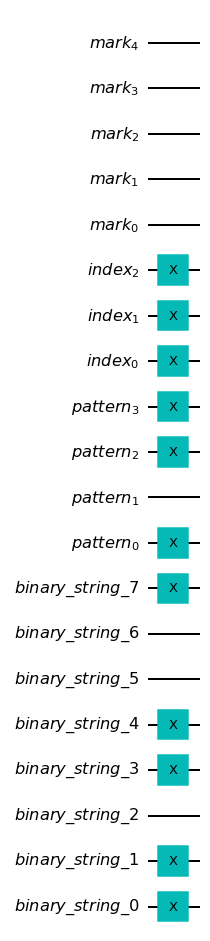

In [3]:

#this is for pattern segment
#def check_one(a):
 #   for i in a:
  #      if(a[i]==1):
            
#mapp_string = list(map(list, int(string)))
#mapp_pattern = list(map(list, int(pattern)))
qr1 = QuantumRegister(len(string), 'binary_string') #this is binary string of lengths N, here N=8
qr2 = QuantumRegister(len(pattern), 'pattern') #this is for binary string of lengths M, for proof M=4
qr3 = QuantumRegister(index, 'index') 
qr4 = QuantumRegister(len(pattern)+1, 'mark')

#qc = QuantumCircuit(qr1, qr2, qr3)
qc = QuantumCircuit(qr1, qr2,qr3, qr4)
#initial_state  = [1,0]
qc.x(qr3[0:index])
#qc.h(qr2[0:len(pattern)])
qc.draw()
for i in range(len(string)):
    if (string[i]=='1'):
        qc.x(qr1[i])
   # qc.x(qr1[i])
for j in range(len(pattern)):
    if (pattern[j]=='1'):
        qc.x(qr2[j])
    #qc.x(qr2[i])
#for i in range(0,33):
    #qc.initialize(initial_state, qr1[i])
#qc.initialize(initial_state, qc1.qubits)
qc.draw(reverse_bits=True)

In [4]:
qc.barrier()



In [6]:
#in this section I am planning to mark pattern 1011
# hence I am planning to expand this paper for 4 qubit
# https://arxiv.org/pdf/1703.10535.pdf
qc.h(qr4[0:len(pattern)])
qc.draw()
qc.barrier()


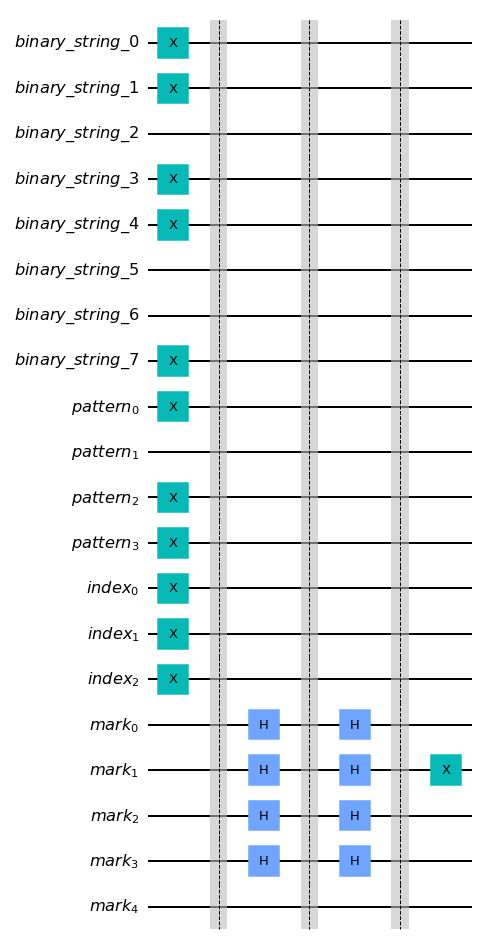

In [7]:
# to mark- that means to apply- grover algorithm
# I followed boolean oracle described in the previous paper
for j in range(len(pattern)):
    if (pattern[j]=='0'):
        qc.x(qr4[j])
qc.draw()


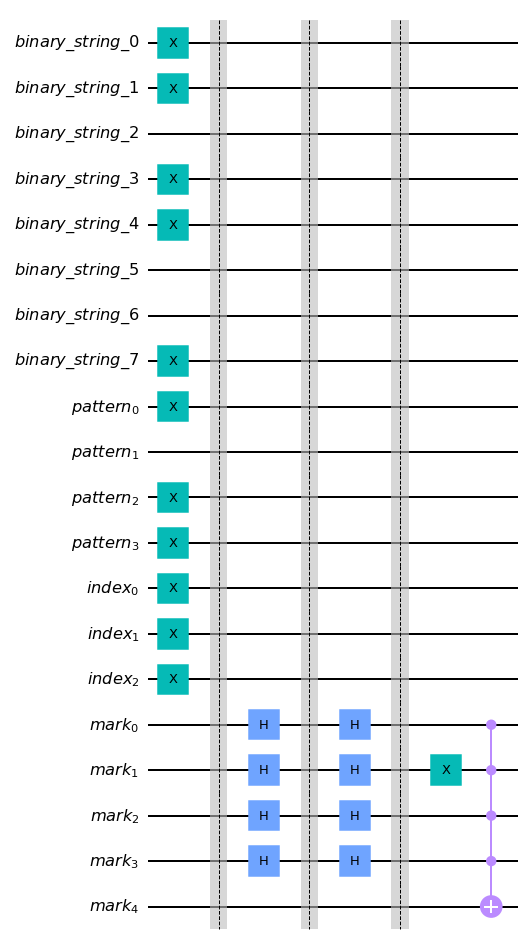

In [8]:
# applied mct gate for the grover algorithm
qc.mct(qr4[0:4], qr4[4])
qc.draw()

In [9]:
for j in range(len(pattern)):
    if (pattern[j]=='0'):
        qc.x(qr4[j])
qc.draw()
qc.barrier()

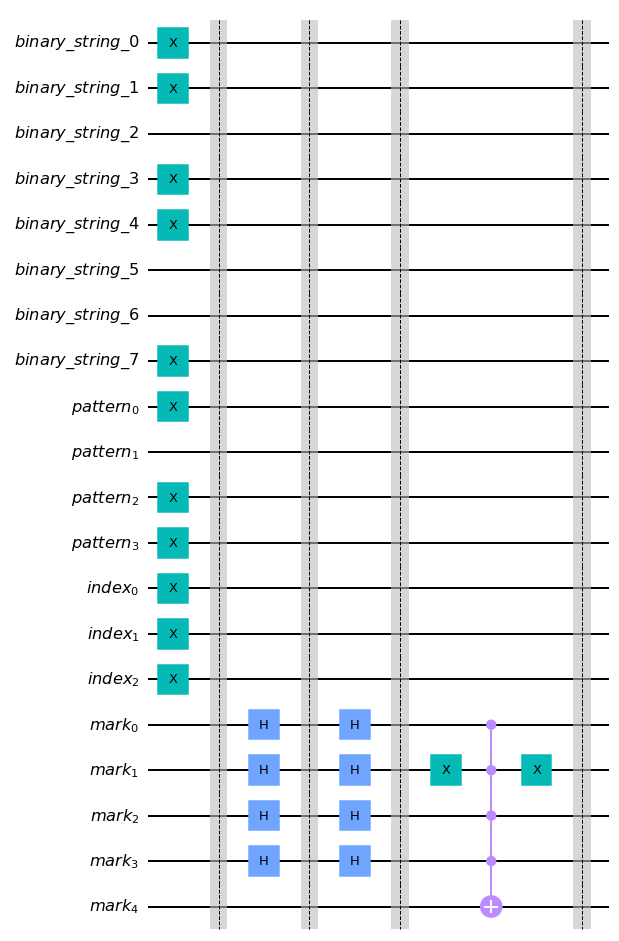

In [10]:
qc.draw()

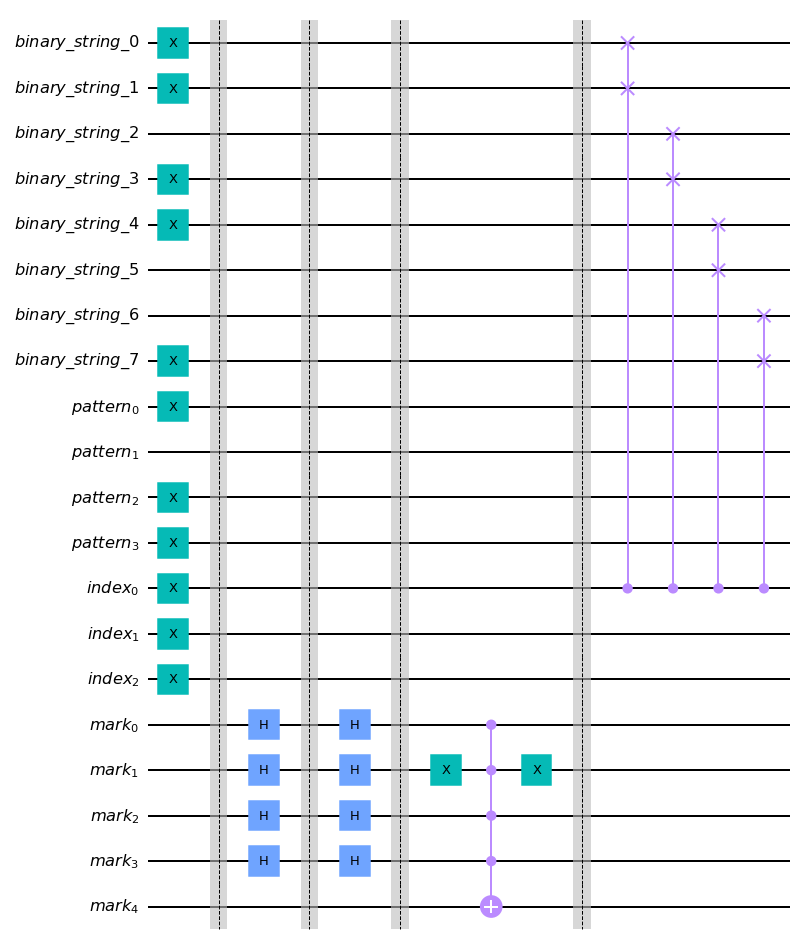

In [11]:
# cyclic shift operator been checked here
# swapping for 2**0 bit position 
# that means 1 bit
qc.cswap(qr3[0], qr1[0], qr1[1])
qc.cswap(qr3[0], qr1[2], qr1[3])
qc.cswap(qr3[0], qr1[4], qr1[5])
qc.cswap(qr3[0], qr1[6], qr1[7])
qc.draw()

In [12]:
# here swapped for 2**1 bit positions
# that means for 2 bit positions
qc.barrier()
qc.cswap(qr3[1], qr1[0], qr1[2])
qc.cswap(qr3[1], qr1[1], qr1[3])
qc.cswap(qr3[1], qr1[4], qr1[6])
qc.cswap(qr3[1], qr1[5], qr1[7])
qc.draw()
qc.barrier()
    

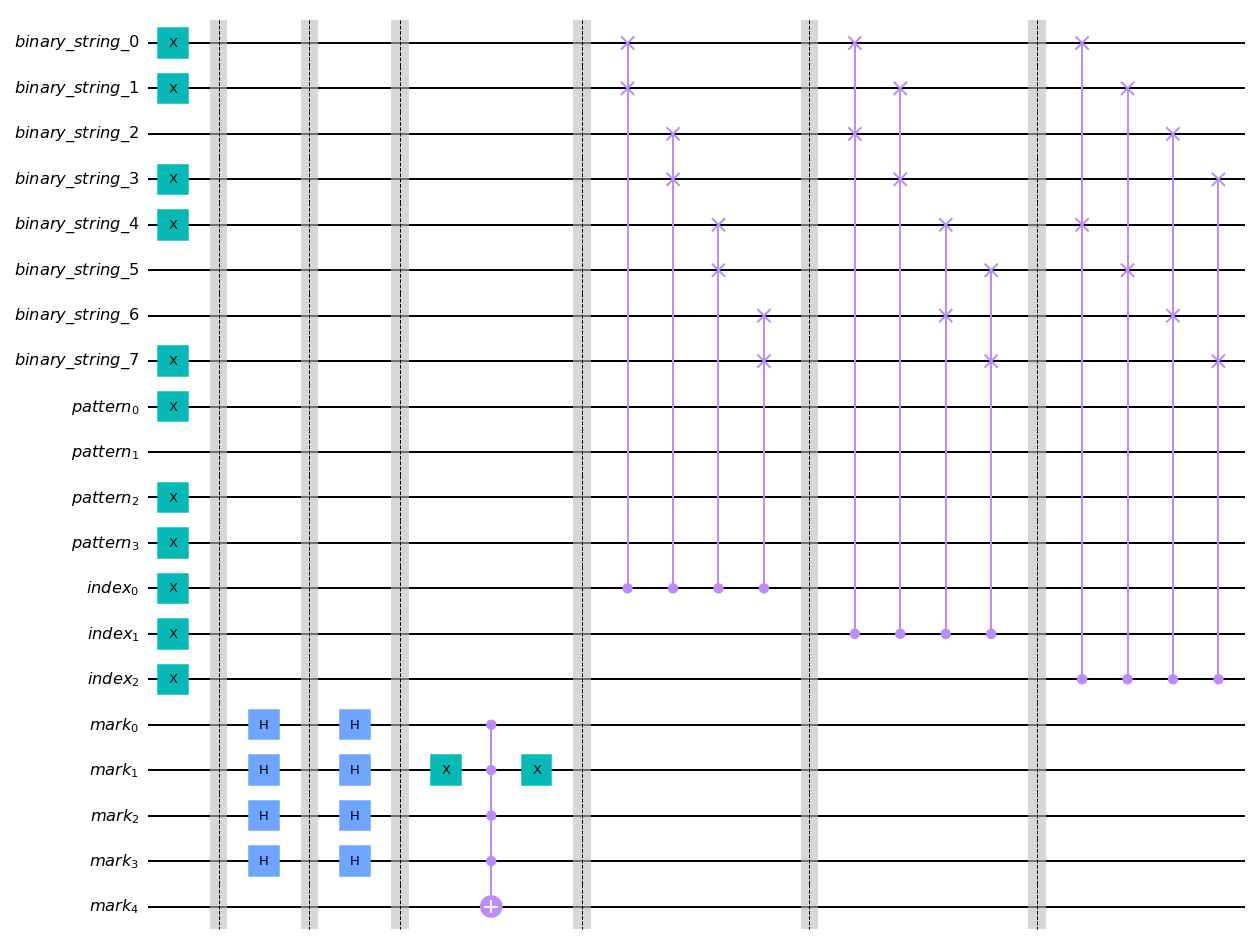

In [13]:
qc.cswap(qr3[2], qr1[0], qr1[4])
qc.cswap(qr3[2], qr1[1], qr1[5])
qc.cswap(qr3[2], qr1[2], qr1[6])
qc.cswap(qr3[2], qr1[3], qr1[7])
qc.draw()

#qc.measure(qr3[0],0)
#qc.measure(qr3[1], 1)
#simulator = Aer.get_backend('aer_simulator')
#qc = transpile(qc, simulator)

#result = simulator.run(qc).result()
#counts = result.get_counts(qc)
#plot_histogram(counts, title='Matching count')

In [ ]:
# Create a Quantum Circuit
from qiskit import *
meas = QuantumCircuit(2, 2)
meas.barrier(range(2))
# map the quantum measurement to the classical bits
meas.measure(range(2), range(2))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = qc + meas

# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

